In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Import data from G-drive

In [3]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/customer_survey.xlsx')
data.head()

,Timestamp,คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารญี่ปุ่น],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารไทย],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารอีสาน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารสุขภาพ],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [บุฟเฟต์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ชาบูชาบู],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ปิ้งย่าง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เหล้าเบียร์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เสื้อผ้าแฟชั่น],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [แต่งหน้า],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [skincare บำรุงผิว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การออกกำลังกาย],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเล่นเกมส์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การท่องเที่ยว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านหนังสือ],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านบทความ Online],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเรียน e-learning],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Series],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดูหนัง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Youtube],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Netflix],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content ด้านบันเทิง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่่ยวกับเกมส์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการ review ร้านอาหาร],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการท่องเที่ยว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการแต่งบ้าน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการโทรทัศน์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับละคร],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการเมือง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารญี่ปุ่น],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารจึน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารไทย],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารอีสาน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารสุขภาพ],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [บุฟเฟต์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ชาบูชาบู],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ปิ้งย่าง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เหล้าเบียร์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เสื้อผ้าแฟชั่น],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [แต่งหน้า],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [skincare บำรุงผิว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การออกกำลังกาย],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเล่นเกมส์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การท่องเที่ยว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านหนังสือ],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านบทความ Online],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเรียน e-learning],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Series],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดูหนัง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Youtube],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Netflix],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content ด้านบันเทิง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่่ยวกับเกมส์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการ review ร้านอาหาร],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการท่องเที่ยว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการแต่งบ้าน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการโทรทัศน์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับละคร],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการเมือง],นอกเหนือจากรายการดังกล่าวแล้ว คุณมีความสนใจในเรื่องใดอีกบ้าง,คุณเกิดวันที่เท่าไหร่,เพศ
0,2021-01-09 10:07:27.365,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 คร

Prepare interting rank and cosuming rank

In [4]:
interesting_rank = {'สนใจอย่างมากที่สุด':7,'สนใจอย่างมาก':6,'สนใจ':5, 'เฉยๆ':4,'ไม่สนใจ':3,'ไม่สนใจอย่างมาก':2,'ไม่สนใจอย่างมากที่สุด':1}
consuming_rank = {'แทบทุกวัน':6,'อาทิตย์ละครั้ง':5,'เดือนละ 2-3 ครั้ง':4, 'หลายเดือนครั้ง':2, 'แทบไม่ได้บริโภคเลย':1,'เดือนละครั้ง':3}

**Data cleansing**

Mapping interesting from text to score

In [5]:
def mapping_interesting(item):
    if item in interesting_rank.keys():
      return interesting_rank[item]
    else:
      return -1

In [6]:
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารญี่ปุ่น]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารญี่ปุ่น]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารไทย]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารไทย]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารอีสาน]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารอีสาน]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารสุขภาพ]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารสุขภาพ]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [บุฟเฟต์]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [บุฟเฟต์]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ชาบูชาบู]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ชาบูชาบู]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ปิ้งย่าง]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ปิ้งย่าง]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เหล้าเบียร์]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เหล้าเบียร์]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เสื้อผ้าแฟชั่น]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เสื้อผ้าแฟชั่น]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [แต่งหน้า]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [แต่งหน้า]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [skincare บำรุงผิว]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [skincare บำรุงผิว]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การออกกำลังกาย]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การออกกำลังกาย]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเล่นเกมส์]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเล่นเกมส์]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การท่องเที่ยว]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การท่องเที่ยว]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านหนังสือ]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านหนังสือ]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านบทความ Online]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านบทความ Online]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเรียน e-learning]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเรียน e-learning]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Series]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Series]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดูหนัง]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดูหนัง]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Youtube]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Youtube]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Netflix]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Netflix]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content ด้านบันเทิง]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content ด้านบันเทิง]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่่ยวกับเกมส์]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่่ยวกับเกมส์]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการ review ร้านอาหาร]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการ review ร้านอาหาร]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการท่องเที่ยว]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการท่องเที่ยว]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการแต่งบ้าน]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการแต่งบ้าน]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการโทรทัศน์]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการโทรทัศน์]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับละคร]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับละคร]"].apply(mapping_interesting)
data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการเมือง]"] =data["คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการเมือง]"].apply(mapping_interesting)

Mapping cosuming from text to score

In [7]:
def mapping_consuming(item):
    if item in consuming_rank.keys():
      return consuming_rank[item]
    else:
      return -1

In [8]:
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารญี่ปุ่น]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารญี่ปุ่น]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารจึน]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารจึน]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารไทย]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารไทย]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารอีสาน]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารอีสาน]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารสุขภาพ]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารสุขภาพ]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [บุฟเฟต์]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [บุฟเฟต์]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ชาบูชาบู]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ชาบูชาบู]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ปิ้งย่าง]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ปิ้งย่าง]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เหล้าเบียร์]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เหล้าเบียร์]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เสื้อผ้าแฟชั่น]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เสื้อผ้าแฟชั่น]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [แต่งหน้า]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [แต่งหน้า]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [skincare บำรุงผิว]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [skincare บำรุงผิว]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การออกกำลังกาย]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การออกกำลังกาย]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเล่นเกมส์]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเล่นเกมส์]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การท่องเที่ยว]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การท่องเที่ยว]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านหนังสือ]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านหนังสือ]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านบทความ Online]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านบทความ Online]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเรียน e-learning]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเรียน e-learning]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Series]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Series]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดูหนัง]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดูหนัง]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Youtube]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Youtube]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Netflix]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Netflix]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content ด้านบันเทิง]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content ด้านบันเทิง]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่่ยวกับเกมส์]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่่ยวกับเกมส์]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการ review ร้านอาหาร]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการ review ร้านอาหาร]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการท่องเที่ยว]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการท่องเที่ยว]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการแต่งบ้าน]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการแต่งบ้าน]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการโทรทัศน์]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการโทรทัศน์]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับละคร]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับละคร]"].apply(mapping_consuming)
data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการเมือง]"] =data["คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการเมือง]"].apply(mapping_consuming)

In [9]:
data.head()

,Timestamp,คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารญี่ปุ่น],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารไทย],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารอีสาน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารสุขภาพ],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [บุฟเฟต์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ชาบูชาบู],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ปิ้งย่าง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เหล้าเบียร์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เสื้อผ้าแฟชั่น],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [แต่งหน้า],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [skincare บำรุงผิว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การออกกำลังกาย],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเล่นเกมส์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การท่องเที่ยว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านหนังสือ],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านบทความ Online],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเรียน e-learning],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Series],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดูหนัง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Youtube],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Netflix],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content ด้านบันเทิง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่่ยวกับเกมส์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการ review ร้านอาหาร],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการท่องเที่ยว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการแต่งบ้าน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการโทรทัศน์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับละคร],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการเมือง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารญี่ปุ่น],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารจึน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารไทย],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารอีสาน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารสุขภาพ],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [บุฟเฟต์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ชาบูชาบู],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ปิ้งย่าง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เหล้าเบียร์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เสื้อผ้าแฟชั่น],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [แต่งหน้า],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [skincare บำรุงผิว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การออกกำลังกาย],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเล่นเกมส์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การท่องเที่ยว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านหนังสือ],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านบทความ Online],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเรียน e-learning],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Series],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดูหนัง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Youtube],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Netflix],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content ด้านบันเทิง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่่ยวกับเกมส์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการ review ร้านอาหาร],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการท่องเที่ยว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการแต่งบ้าน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการโทรทัศน์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับละคร],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการเมือง],นอกเหนือจากรายการดังกล่าวแล้ว คุณมีความสนใจในเรื่องใดอีกบ้าง,คุณเกิดวันที่เท่าไหร่,เพศ
0,2021-01-09 10:07:27.365,5,5,7,6,5,5,5,5,7,4,3,5,6,6,4,5,5,7,6,6,5,7,5,6,6,4,4,4,4,7,4,2,6,5,6,4,4,3,5,2,2,6,6,5,4,4,4,4,4,5,5,5,2,3,4,4,4,4,4,6,"กีฬา UFC, Soccer",1988-09-19 00:00:00,ชาย
1,2021-01-09 10:07:34.010,6,4,7,6,5,6,7,6,3,4,4,4,6,6,7,7,7,7,4,7,7,6,4,4,6,7,7,4,3,5,5,2,6,5,5,4,4,4,1,3,1,3,6,6,3,6,6,5,2,5,6,4,3,4,6,6,5,2,2,5,กีฬา สัตว์เลี้ยง เทคโนโลยี,2536-08-10 00:00:00,หญิง
2,2021-01-09 10:07:35.902,7,4,6,5,4,7,7,7,2,4,1,2,5,7,7,7,7,4,7,7,7,7,7,7,7,7,7,6,3,7,5,2,6,2,2,3,3,3,1,1,1,1,2,5,2,6,4,4,6,6,6,6,6,6,6,4,4,4,2,6,-,1993-11-07 00:00:

In [10]:
data.drop(columns=['Timestamp'], inplace=True)
data.head()

,คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารญี่ปุ่น],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารไทย],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารอีสาน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารสุขภาพ],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [บุฟเฟต์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ชาบูชาบู],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ปิ้งย่าง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เหล้าเบียร์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เสื้อผ้าแฟชั่น],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [แต่งหน้า],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [skincare บำรุงผิว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การออกกำลังกาย],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเล่นเกมส์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การท่องเที่ยว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านหนังสือ],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านบทความ Online],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเรียน e-learning],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Series],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดูหนัง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Youtube],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Netflix],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content ด้านบันเทิง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่่ยวกับเกมส์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการ review ร้านอาหาร],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการท่องเที่ยว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการแต่งบ้าน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการโทรทัศน์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับละคร],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการเมือง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารญี่ปุ่น],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารจึน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารไทย],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารอีสาน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารสุขภาพ],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [บุฟเฟต์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ชาบูชาบู],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ปิ้งย่าง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เหล้าเบียร์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เสื้อผ้าแฟชั่น],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [แต่งหน้า],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [skincare บำรุงผิว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การออกกำลังกาย],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเล่นเกมส์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การท่องเที่ยว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านหนังสือ],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านบทความ Online],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเรียน e-learning],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Series],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดูหนัง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Youtube],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Netflix],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content ด้านบันเทิง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่่ยวกับเกมส์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการ review ร้านอาหาร],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการท่องเที่ยว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการแต่งบ้าน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการโทรทัศน์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับละคร],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการเมือง],นอกเหนือจากรายการดังกล่าวแล้ว คุณมีความสนใจในเรื่องใดอีกบ้าง,คุณเกิดวันที่เท่าไหร่,เพศ
0,5,5,7,6,5,5,5,5,7,4,3,5,6,6,4,5,5,7,6,6,5,7,5,6,6,4,4,4,4,7,4,2,6,5,6,4,4,3,5,2,2,6,6,5,4,4,4,4,4,5,5,5,2,3,4,4,4,4,4,6,"กีฬา UFC, Soccer",1988-09-19 00:00:00,ชาย
1,6,4,7,6,5,6,7,6,3,4,4,4,6,6,7,7,7,7,4,7,7,6,4,4,6,7,7,4,3,5,5,2,6,5,5,4,4,4,1,3,1,3,6,6,3,6,6,5,2,5,6,4,3,4,6,6,5,2,2,5,กีฬา สัตว์เลี้ยง เทคโนโลยี,2536-08-10 00:00:00,หญิง
2,7,4,6,5,4,7,7,7,2,4,1,2,5,7,7,7,7,4,7,7,7,7,7,7,7,7,7,6,3,7,5,2,6,2,2,3,3,3,1,1,1,1,2,5,2,6,4,4,6,6,6,6,6,6,6,4,4,4,2,6,-,1993-11-07 00:00:00,ชาย
3,5,4,4,4,5,5,5,5,1,1,1,7,6,7,7,5,5,6,7,7,7,7,1,7,4,5,4,3,1,6,3,1,6,4,1,3,3

Calculate age

In [11]:
from datetime import date

def calculate_age(born_date):
  today = date.today()

  if 2400 > born_date.year <= (today.year+663) :
     age = today.year - born_date.year - ((today.month, today.day) < (born_date.month, born_date.day))
  elif (today.year - 120 + 543) < born_date.year < (today.year + 543 + 120):
     age = (today.year+543) - born_date.year - ((today.month, today.day) < (born_date.month, born_date.day))
  else:
    print(f'bithdate: {born_date}')
    age = np.nan
    print(f'age: {age}')
  return(age)

In [12]:
data['cal_age'] = data['คุณเกิดวันที่เท่าไหร่'].apply(calculate_age)
data.head()

,คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารญี่ปุ่น],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารไทย],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารอีสาน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารสุขภาพ],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [บุฟเฟต์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ชาบูชาบู],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ปิ้งย่าง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เหล้าเบียร์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เสื้อผ้าแฟชั่น],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [แต่งหน้า],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [skincare บำรุงผิว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การออกกำลังกาย],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเล่นเกมส์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การท่องเที่ยว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านหนังสือ],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านบทความ Online],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเรียน e-learning],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Series],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดูหนัง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Youtube],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Netflix],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content ด้านบันเทิง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่่ยวกับเกมส์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการ review ร้านอาหาร],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการท่องเที่ยว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการแต่งบ้าน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการโทรทัศน์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับละคร],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการเมือง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารญี่ปุ่น],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารจึน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารไทย],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารอีสาน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารสุขภาพ],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [บุฟเฟต์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ชาบูชาบู],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ปิ้งย่าง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เหล้าเบียร์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เสื้อผ้าแฟชั่น],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [แต่งหน้า],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [skincare บำรุงผิว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การออกกำลังกาย],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเล่นเกมส์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การท่องเที่ยว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านหนังสือ],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านบทความ Online],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเรียน e-learning],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Series],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดูหนัง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Youtube],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Netflix],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content ด้านบันเทิง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่่ยวกับเกมส์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการ review ร้านอาหาร],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการท่องเที่ยว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการแต่งบ้าน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการโทรทัศน์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับละคร],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการเมือง],นอกเหนือจากรายการดังกล่าวแล้ว คุณมีความสนใจในเรื่องใดอีกบ้าง,คุณเกิดวันที่เท่าไหร่,เพศ,cal_age
0,5,5,7,6,5,5,5,5,7,4,3,5,6,6,4,5,5,7,6,6,5,7,5,6,6,4,4,4,4,7,4,2,6,5,6,4,4,3,5,2,2,6,6,5,4,4,4,4,4,5,5,5,2,3,4,4,4,4,4,6,"กีฬา UFC, Soccer",1988-09-19 00:00:00,ชาย,32
1,6,4,7,6,5,6,7,6,3,4,4,4,6,6,7,7,7,7,4,7,7,6,4,4,6,7,7,4,3,5,5,2,6,5,5,4,4,4,1,3,1,3,6,6,3,6,6,5,2,5,6,4,3,4,6,6,5,2,2,5,กีฬา สัตว์เลี้ยง เทคโนโลยี,2536-08-10 00:00:00,หญิง,27
2,7,4,6,5,4,7,7,7,2,4,1,2,5,7,7,7,7,4,7,7,7,7,7,7,7,7,7,6,3,7,5,2,6,2,2,3,3,3,1,1,1,1,2,5,2,6,4,4,6,6,6,6,6,6,6,4,4,4,2,6,-,1993-11-07 00:00:00,ชาย,27
3,5,4,4,4,5,5,5,5,1,1,1,7,6,7,7,5,5,6,7,7,7,7,1,7,4,5,4,3,

In [13]:
# Clean zero data
for idx, temp in enumerate(data['cal_age']):
  if temp <= 0:
    data['cal_age'][idx] =  data['cal_age'].mean()

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารญี่ปุ่น],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารไทย],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารอีสาน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารสุขภาพ],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [บุฟเฟต์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ชาบูชาบู],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ปิ้งย่าง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เหล้าเบียร์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เสื้อผ้าแฟชั่น],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [แต่งหน้า],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [skincare บำรุงผิว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การออกกำลังกาย],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเล่นเกมส์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การท่องเที่ยว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านหนังสือ],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านบทความ Online],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเรียน e-learning],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Series],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดูหนัง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Youtube],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Netflix],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content ด้านบันเทิง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่่ยวกับเกมส์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการ review ร้านอาหาร],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการท่องเที่ยว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการแต่งบ้าน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการโทรทัศน์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับละคร],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการเมือง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารญี่ปุ่น],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารจึน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารไทย],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารอีสาน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารสุขภาพ],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [บุฟเฟต์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ชาบูชาบู],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ปิ้งย่าง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เหล้าเบียร์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เสื้อผ้าแฟชั่น],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [แต่งหน้า],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [skincare บำรุงผิว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การออกกำลังกาย],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเล่นเกมส์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การท่องเที่ยว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านหนังสือ],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านบทความ Online],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเรียน e-learning],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Series],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดูหนัง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Youtube],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Netflix],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content ด้านบันเทิง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่่ยวกับเกมส์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการ review ร้านอาหาร],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการท่องเที่ยว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการแต่งบ้าน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการโทรทัศน์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับละคร],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการเมือง],นอกเหนือจากรายการดังกล่าวแล้ว คุณมีความสนใจในเรื่องใดอีกบ้าง,คุณเกิดวันที่เท่าไหร่,เพศ,cal_age
0,5,5,7,6,5,5,5,5,7,4,3,5,6,6,4,5,5,7,6,6,5,7,5,6,6,4,4,4,4,7,4,2,6,5,6,4,4,3,5,2,2,6,6,5,4,4,4,4,4,5,5,5,2,3,4,4,4,4,4,6,"กีฬา UFC, Soccer",1988-09-19 00:00:00,ชาย,32
1,6,4,7,6,5,6,7,6,3,4,4,4,6,6,7,7,7,7,4,7,7,6,4,4,6,7,7,4,3,5,5,2,6,5,5,4,4,4,1,3,1,3,6,6,3,6,6,5,2,5,6,4,3,4,6,6,5,2,2,5,กีฬา สัตว์เลี้ยง เทคโนโลยี,2536-08-10 00:00:00,หญิง,27
2,7,4,6,5,4,7,7,7,2,4,1,2,5,7,7,7,7,4,7,7,7,7,7,7,7,7,7,6,3,7,5,2,6,2,2,3,3,3,1,1,1,1,2,5,2,6,4,4,6,6,6,6,6,6,6,4,4,4,2,6,-,1993-11-07 00:00:00,ชาย,27
3,5,4,4,4,5,5,5,5,1,1,1,7,6,7,7,5,5,6,7,7,7,7,1,7,4,5,4,3,

Clean gender

In [14]:
gender_list = {'ชาย':'M', 'หญิง':'F'}
def clean_gender(gender):
  if gender in gender_list.keys():
    return gender_list[gender]
  else:
    return np.nan

In [15]:
data['เพศ'] = data['เพศ'].apply(clean_gender)
data.head()

,คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารญี่ปุ่น],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารไทย],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารอีสาน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารสุขภาพ],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [บุฟเฟต์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ชาบูชาบู],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ปิ้งย่าง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เหล้าเบียร์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เสื้อผ้าแฟชั่น],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [แต่งหน้า],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [skincare บำรุงผิว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การออกกำลังกาย],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเล่นเกมส์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การท่องเที่ยว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านหนังสือ],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านบทความ Online],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเรียน e-learning],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Series],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดูหนัง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Youtube],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Netflix],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content ด้านบันเทิง],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่่ยวกับเกมส์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการ review ร้านอาหาร],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการท่องเที่ยว],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการแต่งบ้าน],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการโทรทัศน์],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับละคร],คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการเมือง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารญี่ปุ่น],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารจึน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารไทย],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารอีสาน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารสุขภาพ],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [บุฟเฟต์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ชาบูชาบู],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ปิ้งย่าง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เหล้าเบียร์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เสื้อผ้าแฟชั่น],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [แต่งหน้า],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [skincare บำรุงผิว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การออกกำลังกาย],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเล่นเกมส์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การท่องเที่ยว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านหนังสือ],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านบทความ Online],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเรียน e-learning],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Series],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดูหนัง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Youtube],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Netflix],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content ด้านบันเทิง],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่่ยวกับเกมส์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการ review ร้านอาหาร],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการท่องเที่ยว],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการแต่งบ้าน],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการโทรทัศน์],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับละคร],คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการเมือง],นอกเหนือจากรายการดังกล่าวแล้ว คุณมีความสนใจในเรื่องใดอีกบ้าง,คุณเกิดวันที่เท่าไหร่,เพศ,cal_age
0,5,5,7,6,5,5,5,5,7,4,3,5,6,6,4,5,5,7,6,6,5,7,5,6,6,4,4,4,4,7,4,2,6,5,6,4,4,3,5,2,2,6,6,5,4,4,4,4,4,5,5,5,2,3,4,4,4,4,4,6,"กีฬา UFC, Soccer",1988-09-19 00:00:00,M,32
1,6,4,7,6,5,6,7,6,3,4,4,4,6,6,7,7,7,7,4,7,7,6,4,4,6,7,7,4,3,5,5,2,6,5,5,4,4,4,1,3,1,3,6,6,3,6,6,5,2,5,6,4,3,4,6,6,5,2,2,5,กีฬา สัตว์เลี้ยง เทคโนโลยี,2536-08-10 00:00:00,F,27
2,7,4,6,5,4,7,7,7,2,4,1,2,5,7,7,7,7,4,7,7,7,7,7,7,7,7,7,6,3,7,5,2,6,2,2,3,3,3,1,1,1,1,2,5,2,6,4,4,6,6,6,6,6,6,6,4,4,4,2,6,-,1993-11-07 00:00:00,M,27
3,5,4,4,4,5,5,5,5,1,1,1,7,6,7,7,5,5,6,7,7,7,7,1,7,4,5,4,3,1,6,3,1

Clean columns name

In [16]:
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารญี่ปุ่น]': 'I_JpFood'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารจึน]': 'I_CnFood'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารไทย]': 'I_ThFood'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารอีสาน]': 'I_NeFood'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [อาหารสุขภาพ]': 'I_HeFood'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [บุฟเฟต์]': 'I_Buffet'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ชาบูชาบู]': 'I_Shabu'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ปิ้งย่าง]': 'I_Grill'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เหล้าเบียร์]': 'I_Beer'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [เสื้อผ้าแฟชั่น]': 'I_Fasion'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [แต่งหน้า]': 'I_Cosmetic'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [skincare บำรุงผิว]': 'I_SkinCare'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การออกกำลังกาย]': 'I_Excecise'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเล่นเกมส์]': 'I_Game'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การท่องเที่ยว]': 'I_Travel'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านหนังสือ]': 'I_Book'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การอ่านบทความ Online]': 'I_Online'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [การเรียน e-learning]': 'I_Elearn'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Series]': 'I_Series'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดูหนัง]': 'I_Movie'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Youtube]': 'I_Youtube'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [ดู Netflix]': 'I_Netflix'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content ด้านบันเทิง]': 'I_Entertain'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่่ยวกับเกมส์]': 'I_ConGame'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการ review ร้านอาหาร]': 'I_ConFood'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการท่องเที่ยว]': 'I_ConTravel'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการแต่งบ้าน]': 'I_Home'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการโทรทัศน์]': 'I_Tv'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับละคร]': 'I_Drama'},inplace=True)
data.rename(columns={'คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด [Content เกี่ยวกับการเมือง]': 'I_Politics'},inplace=True)


In [17]:
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารญี่ปุ่น]': 'C_JpFood'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารจึน]': 'C_CnFood'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารไทย]': 'C_ThFood'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารอีสาน]': 'C_NeFood'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [อาหารสุขภาพ]': 'C_HeFood'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [บุฟเฟต์]': 'C_Buffet'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ชาบูชาบู]': 'C_Shabu'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ปิ้งย่าง]': 'C_Grill'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เหล้าเบียร์]': 'C_Beer'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [เสื้อผ้าแฟชั่น]': 'C_Fasion'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [แต่งหน้า]': 'C_Cosmetic'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [skincare บำรุงผิว]': 'C_SkinCare'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การออกกำลังกาย]': 'C_Excecise'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเล่นเกมส์]': 'C_Game'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การท่องเที่ยว]': 'C_Travel'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านหนังสือ]': 'C_Book'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การอ่านบทความ Online]': 'C_Online'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [การเรียน e-learning]': 'C_Elearn'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Series]': 'C_Series'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดูหนัง]': 'C_Movie'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Youtube]': 'C_Youtube'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [ดู Netflix]': 'C_Netflix'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content ด้านบันเทิง]': 'C_Entertain'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่่ยวกับเกมส์]': 'C_ConGame'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการ review ร้านอาหาร]': 'C_ConFood'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการท่องเที่ยว]': 'C_ConTravel'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการแต่งบ้าน]': 'C_Home'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการโทรทัศน์]': 'C_Tv'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับละคร]': 'C_Drama'},inplace=True)
data.rename(columns={'คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน [Content เกี่ยวกับการเมือง]': 'C_Politics'},inplace=True)
data.rename(columns={'นอกเหนือจากรายการดังกล่าวแล้ว คุณมีความสนใจในเรื่องใดอีกบ้าง': 'Other'},inplace=True)
data.rename(columns={'คุณเกิดวันที่เท่าไหร่': 'BithDat'},inplace=True)
data.rename(columns={'เพศ': 'Gender'},inplace=True)

In [18]:
data.head()

,I_JpFood,I_CnFood,I_ThFood,I_NeFood,I_HeFood,I_Buffet,I_Shabu,I_Grill,I_Beer,I_Fasion,I_Cosmetic,I_SkinCare,I_Excecise,I_Game,I_Travel,I_Book,I_Online,I_Elearn,I_Series,I_Movie,I_Youtube,I_Netflix,I_Entertain,I_ConGame,I_ConFood,I_ConTravel,I_Home,I_Tv,I_Drama,I_Politics,C_JpFood,C_CnFood,C_ThFood,C_NeFood,C_HeFood,C_Buffet,C_Shabu,C_Grill,C_Beer,C_Fasion,C_Cosmetic,C_SkinCare,C_Excecise,C_Game,C_Travel,C_Book,C_Online,C_Elearn,C_Series,C_Movie,C_Youtube,C_Netflix,C_Entertain,C_ConGame,C_ConFood,C_ConTravel,C_Home,C_Tv,C_Drama,C_Politics,Other,BithDat,Gender,cal_age
0,5,5,7,6,5,5,5,5,7,4,3,5,6,6,4,5,5,7,6,6,5,7,5,6,6,4,4,4,4,7,4,2,6,5,6,4,4,3,5,2,2,6,6,5,4,4,4,4,4,5,5,5,2,3,4,4,4,4,4,6,"กีฬา UFC, Soccer",1988-09-19 00:00:00,M,32
1,6,4,7,6,5,6,7,6,3,4,4,4,6,6,7,7,7,7,4,7,7,6,4,4,6,7,7,4,3,5,5,2,6,5,5,4,4,4,1,3,1,3,6,6,3,6,6,5,2,5,6,4,3,4,6,6,5,2,2,5,กีฬา สัตว์เลี้ยง เทคโนโลยี,2536-08-10 00:00:00,F,27
2,7,4,6,5,4,7,7,7,2,4,1,2,5,7,7,7,7,4,7,7,7,7,7,7,7,7,7,6,3,7,5,2,6,2,2,3,3,3,1,1,1,1,2,5,2,6,4,4,6,6,6,6,6,6,6,4,4,4,2,6,-,1993-11-07 00:00:00,M,27
3,5,4,4,4,5,5,5,5,1,1,1,7,6,7,7,5,5,6,7,7,7,7,1,7,4,5,4,3,1,6,3,1,6,4,1,3,3,3,1,1,1,6,3,4,2,4,4,4,5,5,5,5,1,6,3,3,1,1,1,4,"โหราศาสตร์,ดูดวง",1994-04-14 00:00:00,M,27
4,6,5,5,5,7,4,4,4,4,4,5,6,7,3,5,6,5,5,7,7,4,7,4,3,4,5,5,3,3,4,4,3,5,5,6,2,2,2,3,3,6,6,6,1,2,4,5,4,5,5,4,5,3,1,3,4,3,1,1,4,สัตว์เลี้ยง,1995-04-19 00:00:00,F,26


Add weekday of birthdate

In [19]:
data['weekday_birth'] = data['BithDat'].apply(lambda x: x.weekday())
data.head()

,I_JpFood,I_CnFood,I_ThFood,I_NeFood,I_HeFood,I_Buffet,I_Shabu,I_Grill,I_Beer,I_Fasion,I_Cosmetic,I_SkinCare,I_Excecise,I_Game,I_Travel,I_Book,I_Online,I_Elearn,I_Series,I_Movie,I_Youtube,I_Netflix,I_Entertain,I_ConGame,I_ConFood,I_ConTravel,I_Home,I_Tv,I_Drama,I_Politics,C_JpFood,C_CnFood,C_ThFood,C_NeFood,C_HeFood,C_Buffet,C_Shabu,C_Grill,C_Beer,C_Fasion,C_Cosmetic,C_SkinCare,C_Excecise,C_Game,C_Travel,C_Book,C_Online,C_Elearn,C_Series,C_Movie,C_Youtube,C_Netflix,C_Entertain,C_ConGame,C_ConFood,C_ConTravel,C_Home,C_Tv,C_Drama,C_Politics,Other,BithDat,Gender,cal_age,weekday_birth
0,5,5,7,6,5,5,5,5,7,4,3,5,6,6,4,5,5,7,6,6,5,7,5,6,6,4,4,4,4,7,4,2,6,5,6,4,4,3,5,2,2,6,6,5,4,4,4,4,4,5,5,5,2,3,4,4,4,4,4,6,"กีฬา UFC, Soccer",1988-09-19 00:00:00,M,32,0
1,6,4,7,6,5,6,7,6,3,4,4,4,6,6,7,7,7,7,4,7,7,6,4,4,6,7,7,4,3,5,5,2,6,5,5,4,4,4,1,3,1,3,6,6,3,6,6,5,2,5,6,4,3,4,6,6,5,2,2,5,กีฬา สัตว์เลี้ยง เทคโนโลยี,2536-08-10 00:00:00,F,27,4
2,7,4,6,5,4,7,7,7,2,4,1,2,5,7,7,7,7,4,7,7,7,7,7,7,7,7,7,6,3,7,5,2,6,2,2,3,3,3,1,1,1,1,2,5,2,6,4,4,6,6,6,6,6,6,6,4,4,4,2,6,-,1993-11-07 00:00:00,M,27,6
3,5,4,4,4,5,5,5,5,1,1,1,7,6,7,7,5,5,6,7,7,7,7,1,7,4,5,4,3,1,6,3,1,6,4,1,3,3,3,1,1,1,6,3,4,2,4,4,4,5,5,5,5,1,6,3,3,1,1,1,4,"โหราศาสตร์,ดูดวง",1994-04-14 00:00:00,M,27,3
4,6,5,5,5,7,4,4,4,4,4,5,6,7,3,5,6,5,5,7,7,4,7,4,3,4,5,5,3,3,4,4,3,5,5,6,2,2,2,3,3,6,6,6,1,2,4,5,4,5,5,4,5,3,1,3,4,3,1,1,4,สัตว์เลี้ยง,1995-04-19 00:00:00,F,26,2


Top 10 Interesting by birthdate

In [20]:
def create_top10_chart(df, title_desc=None):
  df_int = df.iloc[:,0:30]
  df_con = df.iloc[:,30:60]

  total_count_int = dict(df_int.sum())
  total_count_int_sort = {k: v for k, v in sorted(total_count_int.items(), key=lambda item: item[1], reverse=True)} # Sort by number of counts
  top_10_items_int = dict(itertools.islice(total_count_int_sort.items(), 10))

  plt.bar(range(len(top_10_items_int)), list(top_10_items_int.values()), align='center')
  plt.title("Top 10 interest items of " + title_desc)
  plt.xticks(range(len(top_10_items_int)), list(top_10_items_int.keys()))
  plt.xticks(rotation=45)
  #plt.savefig('Top 10 interest items of'+'title')
  plt.show()
  

  total_count_con = dict(df_con.sum())
  total_count_con_sort = {k: v for k, v in sorted(total_count_con.items(), key=lambda item: item[1], reverse=True)} # Sort by number of counts
  top_10_items_con = dict(itertools.islice(total_count_con_sort.items(), 10))

  plt.bar(range(len(top_10_items_con)), list(top_10_items_con.values()), align='center')
  plt.title("Top 10 consume items of " + title_desc)
  plt.xticks(range(len(top_10_items_con)), list(top_10_items_con.keys()))
  plt.xticks(rotation=45)
  #plt.savefig('Top 10 consume items of'+'title')
  plt.show()

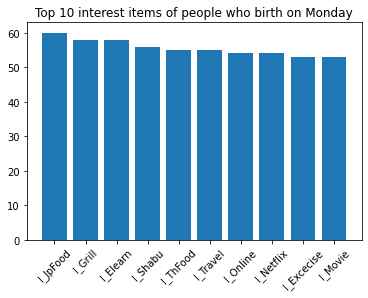

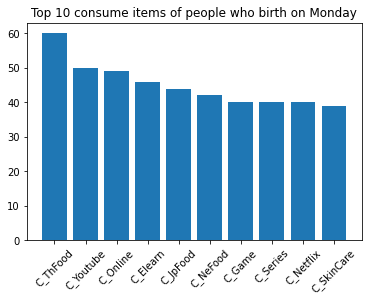

In [21]:
# Monday

data_mon = data[data['weekday_birth'] == 0]
create_top10_chart(data_mon, "people who birth on Monday")

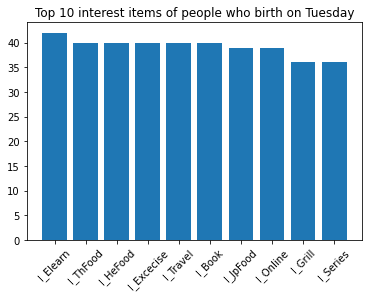

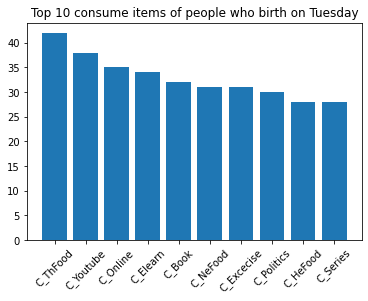

In [22]:
# Tuesday

data_mon = data[data['weekday_birth'] == 1]
create_top10_chart(data_mon, "people who birth on Tuesday")

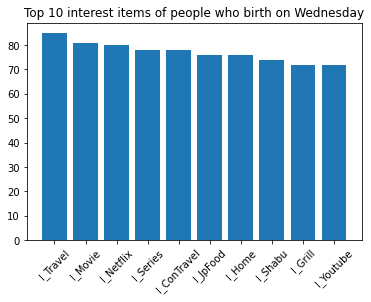

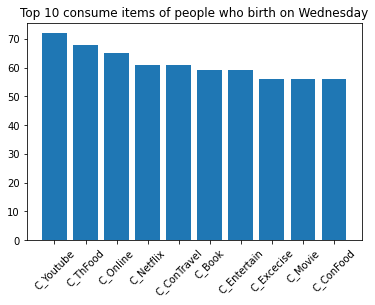

In [24]:
# Wednesday

data_mon = data[data['weekday_birth'] == 2]
create_top10_chart(data_mon, "people who birth on Wednesday")

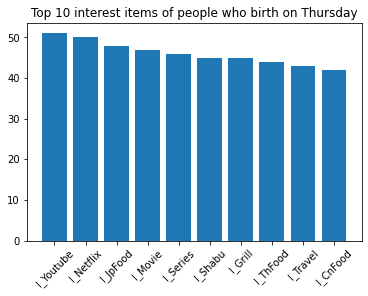

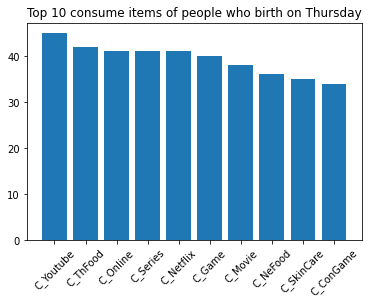

In [25]:
# Thursday

data_mon = data[data['weekday_birth'] == 3]
create_top10_chart(data_mon, "people who birth on Thursday")

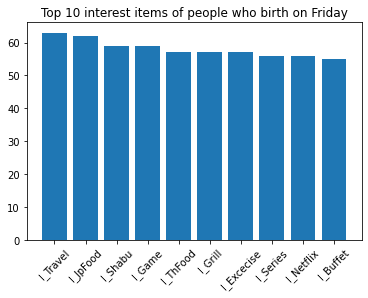

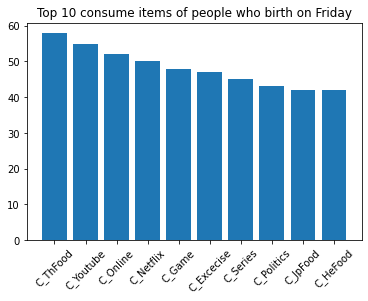

In [26]:
# Friday

data_mon = data[data['weekday_birth'] == 4]
create_top10_chart(data_mon, "people who birth on Friday")

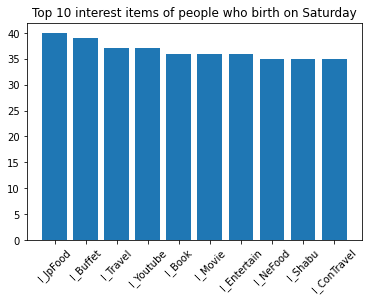

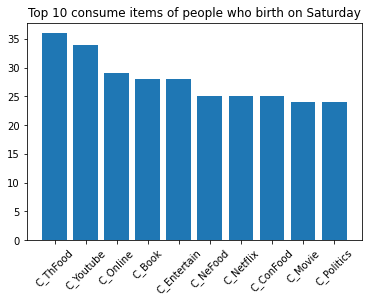

In [29]:
# Saturday

data_mon = data[data['weekday_birth'] == 5]
create_top10_chart(data_mon, "people who birth on Saturday")

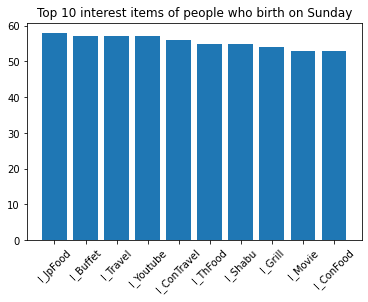

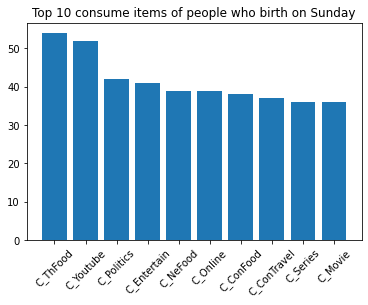

In [31]:
# Sunday

data_mon = data[data['weekday_birth'] == 6]
create_top10_chart(data_mon, "people who birth on Sunday")

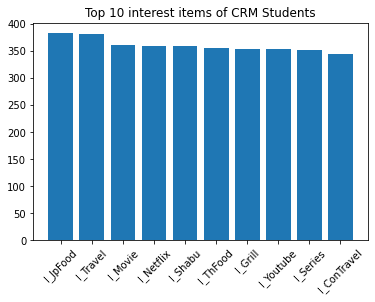

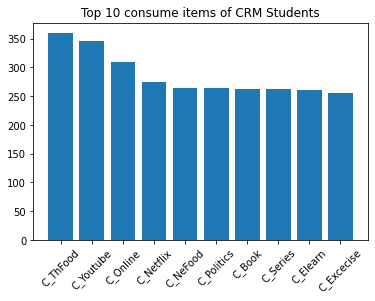

In [32]:
# All

create_top10_chart(data, "CRM Students")

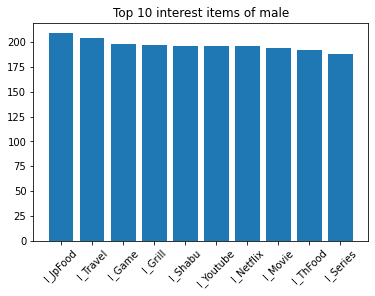

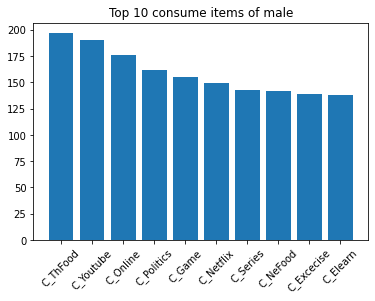

In [33]:
# Male

data_mon = data[data['Gender'] == 'M']
create_top10_chart(data_mon, "male")

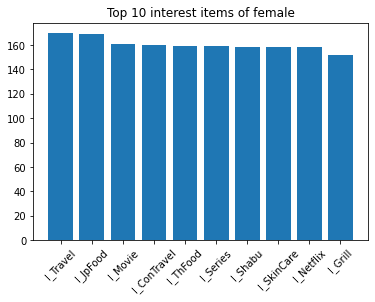

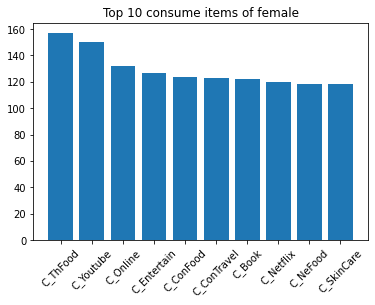

In [35]:
# Female

data_mon = data[data['Gender'] == 'F']
create_top10_chart(data_mon, "female")

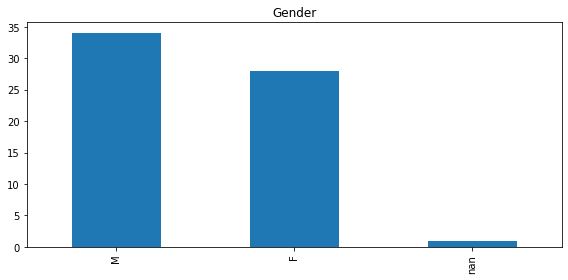

In [ ]:
f, axes = plt.subplots(1,1, figsize=(8,4), tight_layout=True)
data['Gender'].value_counts(dropna=False).plot(kind='bar', title='Gender')
plt.show()

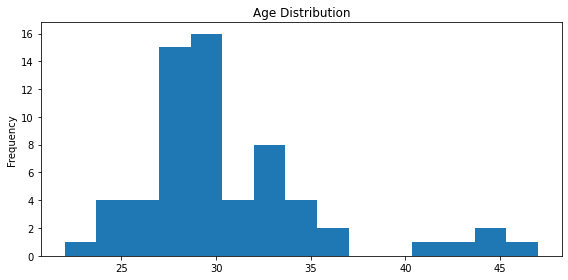

In [ ]:
f, axes = plt.subplots(1,1, figsize=(8,4), tight_layout=True)
data['Age'].plot.hist(bins=15, title='Age Distribution')
plt.show()

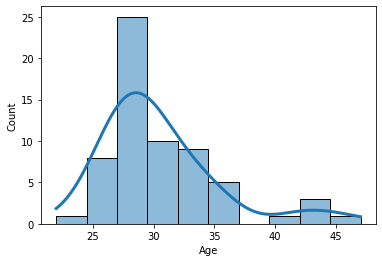

In [ ]:
data.rename(columns={'คุณเกิดวันที่เท่าไหร่': 'Age'},inplace=True)
data.head()
sns.histplot(data=data['Age'],kde=True,line_kws={"linewidth":3})
plt.savefig('/content/drive/MyDrive/Notebook/HW1/age_distributed.png',dpi = 150 , format = 'png' )

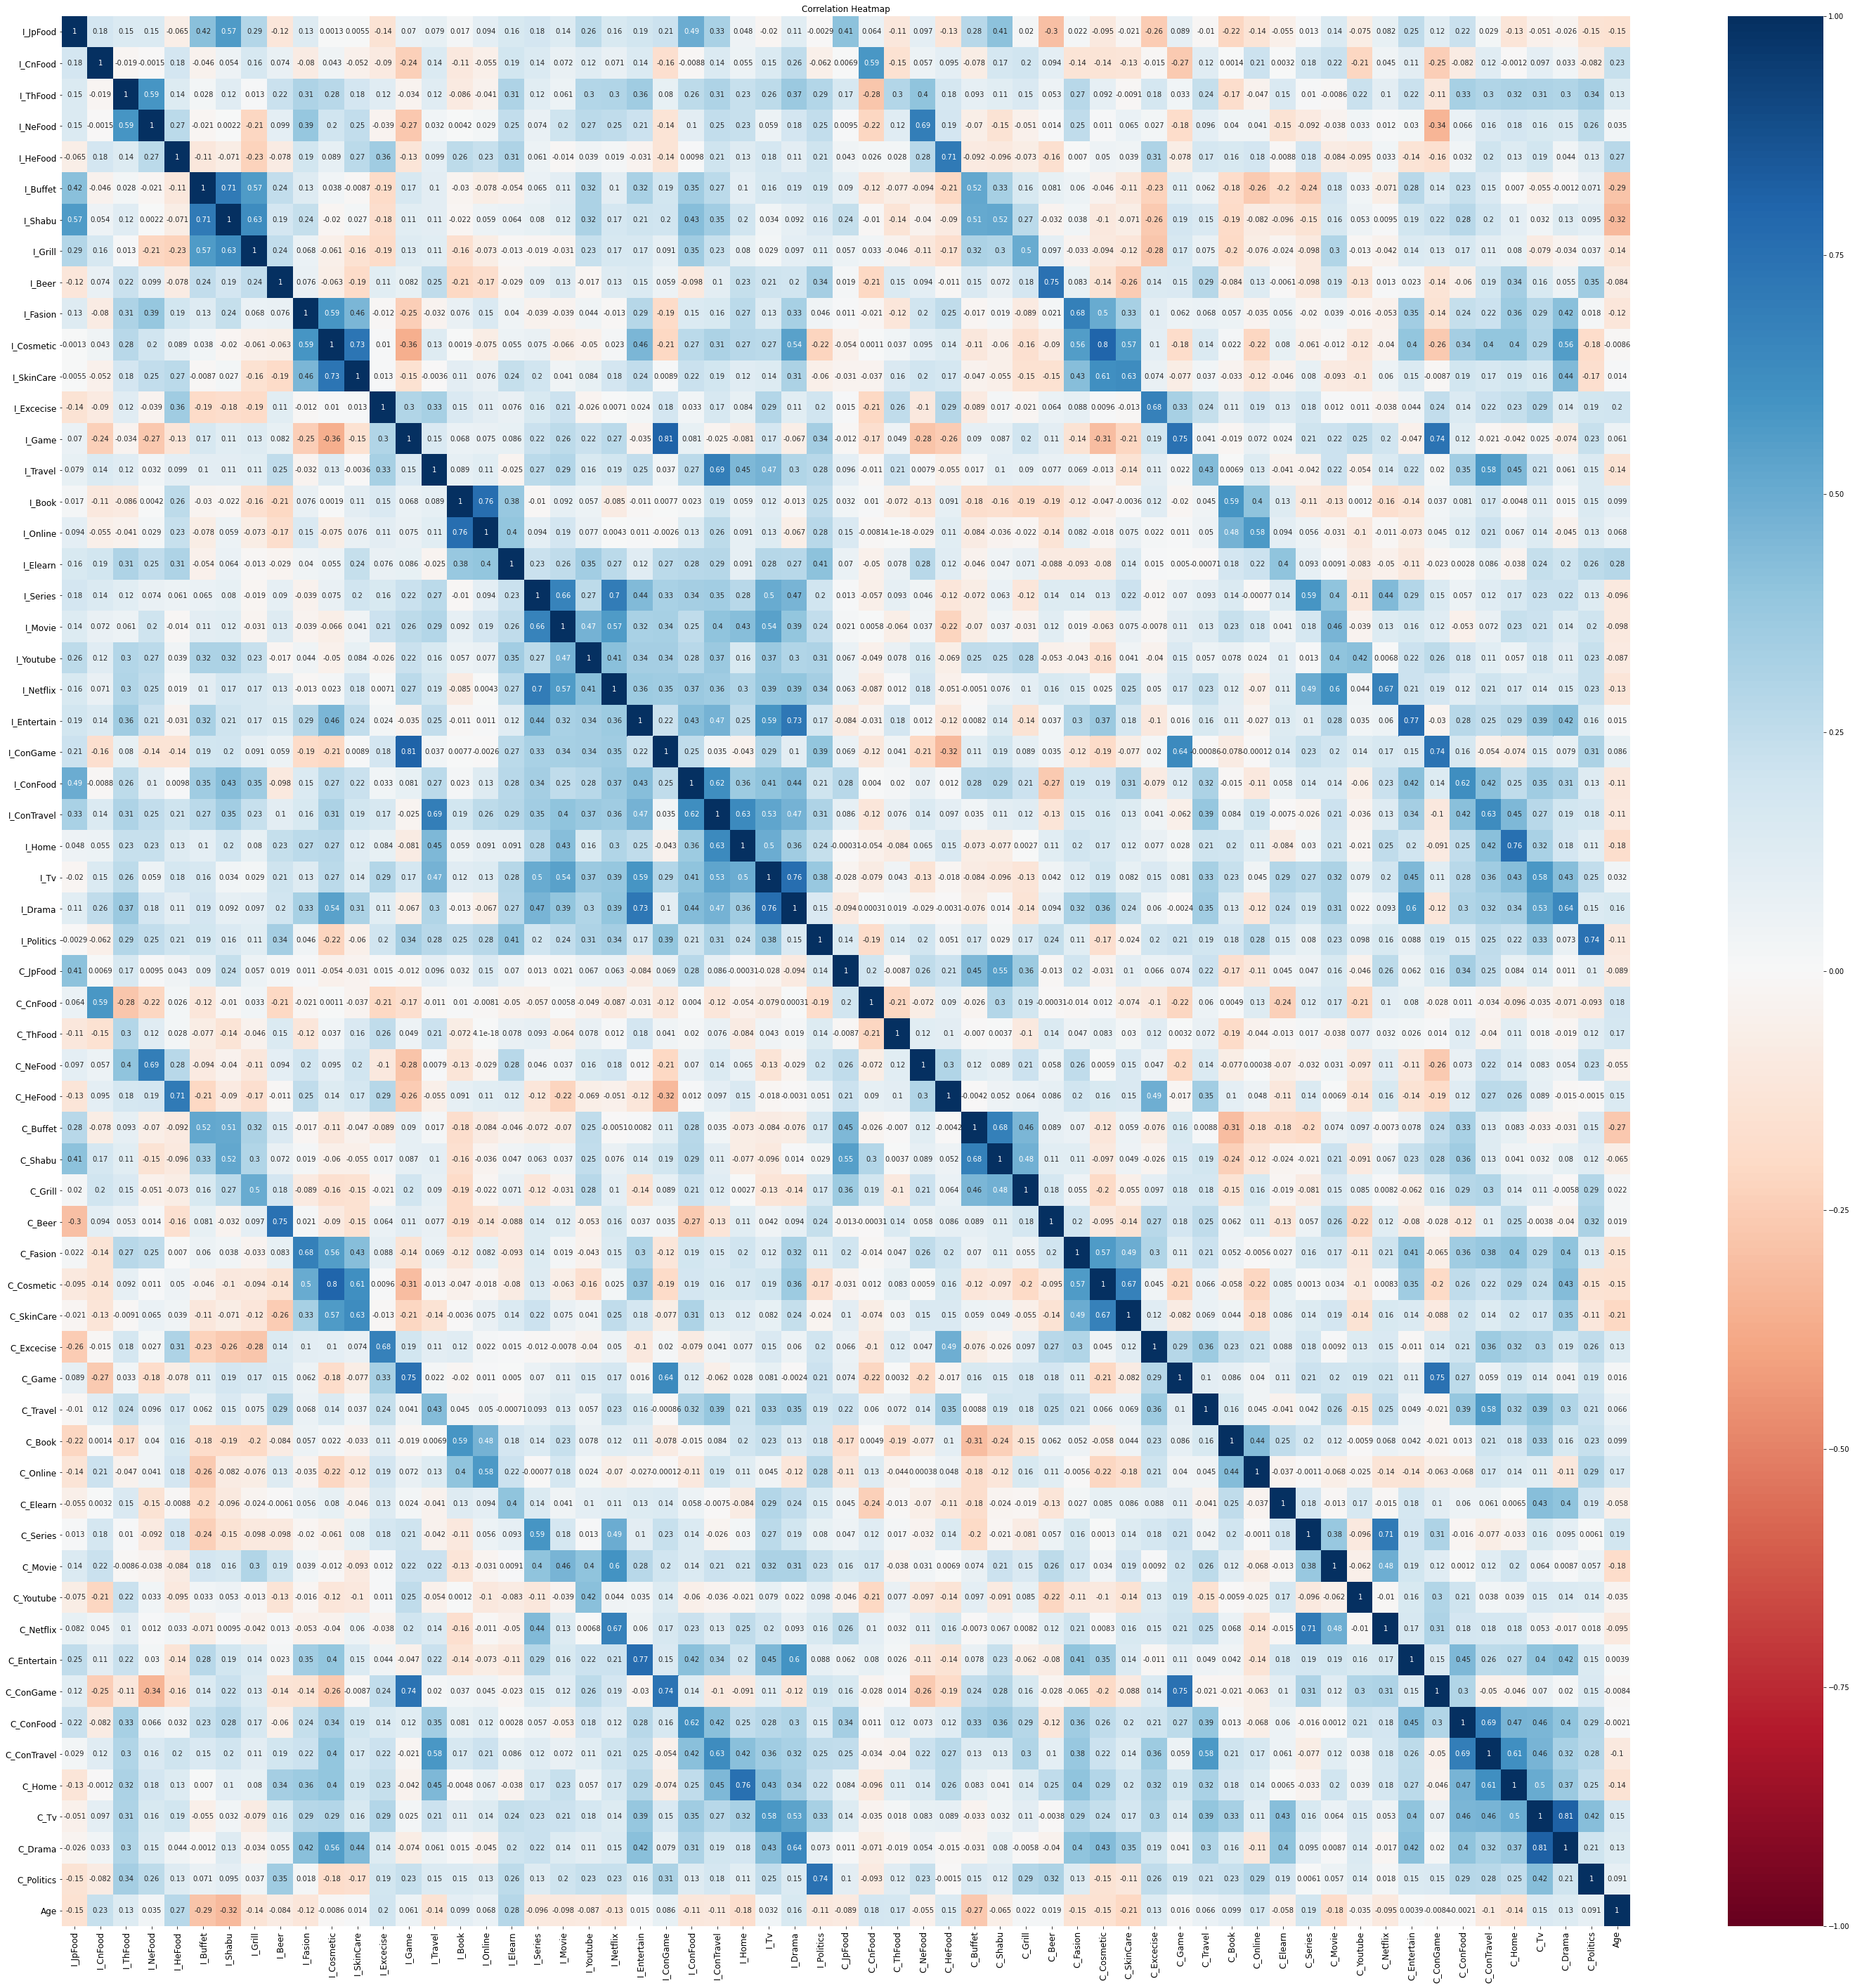

In [ ]:
plt.figure(figsize = (50,50))
s = sns.heatmap(data.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)

s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Correlation Heatmap')
plt.savefig('/content/drive/MyDrive/Notebook/HW1/corr.png',dpi = 150 , format = 'png' )
plt.show()